In [ ]:
! pip install --upgrade pandas tensorflow_gpu ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
! rm -rf apex
! git clone https://www.github.com/nvidia/apex
! cd apex && python setup.py install

Cloning into 'apex'...
remote: Enumerating objects: 11521, done.
remote: Counting objects: 100% (3658/3658), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 11521 (delta 3335), reused 3251 (delta 3149), pack-reused 7863
Receiving objects: 100% (11521/11521), 15.42 MiB | 22.12 MiB/s, done.
Resolving deltas: 100% (8094/8094), done.


torch.__version__  = 2.1.0+cu118


running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()

In [ ]:
# ! cp ./drive/My\ Drive/mlin/hindicorpus/hi_3500.csv ./

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=542523f747b6a79be37a340600f2729d8e1671073d5f883b821e19b5479b8b6d
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
import pandas as pd

df = pd.read_csv("constraint_Hindi_Train - Sheet1.csv", header=0, names=['Post', 'Labels'])
print(df.head())

                                                Post                Labels
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,offensive
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hostile
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hostile
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,offensive
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hostile


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Post'], df['Labels'], random_state=42)

In [ ]:
print(set(y_train.values))

{'defamation,fake', 'defamation,fake,hate,offensive', 'fake,hate', 'hate', 'defamation', 'fake', 'defamation,fake,hate', 'hate,offensive', 'fake,offensive', 'defamation,offensive', 'fake,hate,offensive', 'defamation,hate', 'defamation,fake,offensive', 'offensive', 'defamation,hate,offensive', 'non-hostile'}


ktrain code below based on https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

In [ ]:
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=500, class_names=list(set(y_train.values)))

config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/58.9M [00:00<?, ?B/s]

In [ ]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 30
	95percentile : 57
	99percentile : 84


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/607k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False


In [ ]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 30
	95percentile : 56
	99percentile : 84


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
716/716 [==============================] - 150s 173ms/step - loss: 2.6831 - accuracy: 0.2879
Epoch 2/3
716/716 [==============================] - 126s 175ms/step - loss: 1.5083 - accuracy: 0.5533
Epoch 3/3
716/716 [==============================] - 96s 133ms/step - loss: 26147.8535 - accuracy: 0.5114


done.
Visually inspect loss plot and select learning rate associated with falling loss


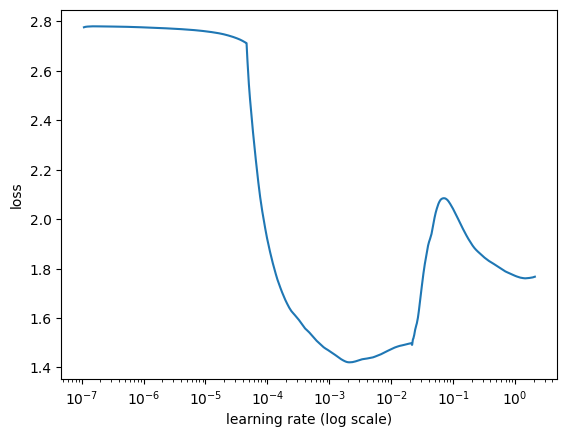

In [ ]:
learner.lr_find(show_plot=True, max_epochs=3)

If you pick a bad learning rate below, learner will remember the bad training. I've purposely included the model = and learner = cells to reset them

**LR = 1e-4, Epochs = 3**

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
716/716 [==============================] - 162s 200ms/step - loss: 1.5091 - accuracy: 0.5901 - val_loss: 1.0121 - val_accuracy: 0.6795
Epoch 2/3
716/716 [==============================] - 150s 209ms/step - loss: 1.0074 - accuracy: 0.6806 - val_loss: 0.9112 - val_accuracy: 0.7151
Epoch 3/3
716/716 [==============================] - 140s 196ms/step - loss: 0.8421 - accuracy: 0.7316 - val_loss: 0.8644 - val_accuracy: 0.7311


**LR = 1.2e-4, Epochs = 5**

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1.2e-4, 5)



begin training using onecycle policy with max lr of 0.00012...
Epoch 1/5
716/716 [==============================] - 168s 211ms/step - loss: 1.5487 - accuracy: 0.5712 - val_loss: 1.0695 - val_accuracy: 0.6767
Epoch 2/5
716/716 [==============================] - 140s 196ms/step - loss: 1.0565 - accuracy: 0.6641 - val_loss: 0.9339 - val_accuracy: 0.7018
Epoch 3/5
716/716 [==============================] - 140s 196ms/step - loss: 0.9315 - accuracy: 0.7041 - val_loss: 0.9325 - val_accuracy: 0.6990
Epoch 4/5
716/716 [==============================] - 140s 196ms/step - loss: 0.8147 - accuracy: 0.7353 - val_loss: 0.8463 - val_accuracy: 0.7284
Epoch 5/5
716/716 [==============================] - 140s 196ms/step - loss: 0.7145 - accuracy: 0.7721 - val_loss: 0.8399 - val_accuracy: 0.7367


In [ ]:
learner.view_top_losses(n=1, preproc=t)

45/45 [==============================] - 17s 294ms/step
----------
id:93 | loss:8.07 | true:fake,offensive | pred:non-hostile)



In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

**LR = 1.2e-4, Epochs = 10**

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1.2e-4, 10)



begin training using onecycle policy with max lr of 0.00012...
Epoch 1/10
716/716 [==============================] - 164s 202ms/step - loss: 1.5803 - accuracy: 0.5642 - val_loss: 1.0847 - val_accuracy: 0.6501
Epoch 2/10
716/716 [==============================] - 141s 196ms/step - loss: 1.0410 - accuracy: 0.6671 - val_loss: 0.9462 - val_accuracy: 0.7032
Epoch 3/10
716/716 [==============================] - 148s 206ms/step - loss: 0.9417 - accuracy: 0.7041 - val_loss: 1.0138 - val_accuracy: 0.7067
Epoch 4/10
716/716 [==============================] - 139s 195ms/step - loss: 0.8517 - accuracy: 0.7356 - val_loss: 0.8767 - val_accuracy: 0.7297
Epoch 5/10
716/716 [==============================] - 140s 196ms/step - loss: 0.7932 - accuracy: 0.7442 - val_loss: 0.8856 - val_accuracy: 0.7200
Epoch 6/10
716/716 [==============================] - 140s 195ms/step - loss: 0.7372 - accuracy: 0.7628 - val_loss: 0.8833 - val_accuracy: 0.7318
Epoch 7/10
716/716 [==============================] - 148s 

In [ ]:
learner.view_top_losses(n=1, preproc=t)

45/45 [==============================] - 16s 293ms/step
----------
id:1222 | loss:11.18 | true:defamation,offensive | pred:non-hostile)



In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
text_to_predict = "हर तीन महीने में कांग्रेस पार्टी गर्भवती होकर ऑपरेशन थिएटर में भर्ती होती है.. खूब हंगामा मचता है कि इस बार जरूर कुछ होगा जरूर कुछ होगा फिर डॉक्टर ऑपरेशन थिएटर से बाहर निकलता है अपना मास्क निकालता है ग्लब्स उतारता है और कहता है सॉरी बस पेट में गैस था.. रिलीज हो गया....!🤣"
predicted_label = predictor.predict(text_to_predict)
print(f"Predicted Label: {predicted_label}")

Predicted Label: offensive


In [ ]:
text_to_predict = "भारतीय जनता पार्टी (भाजपा) के कार्यकर्ताओं द्वारा सिख समुदाय के एक व्यक्ति को पीटा गया है ।"
predicted_label = predictor.predict(text_to_predict)
print(f"Predicted Label: {predicted_label}")

Predicted Label: fake


In [ ]:
text_to_predict = " @Rofl_RavishNDTV: राहुल गांधी ने प्रधानमंत्री चुनाव से पहले बयान दिया कांग्रेस मुसलमानों की पार्टी है फिर मप्र मे दलित किसान पर भाजपा…"
predicted_label = predictor.predict(text_to_predict)
print(f"Predicted Label: {predicted_label}")

Predicted Label: hate


In [ ]:
learner.save_model('Desktop/hindi_bert')